In [1]:
# Imports
import matplotlib.pyplot as plt

from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.plotting import MazePlot
import numpy as np
import DQN.agent as agent



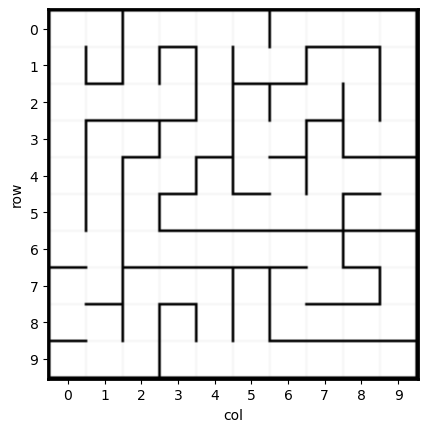

In [2]:
maze_1 = LatticeMazeGenerators.gen_dfs(
    grid_shape=(10, 10),
    lattice_dim=2,
    accessible_cells=None,
    max_tree_depth=None,
    start_coord=None,
    do_forks=True,
)

MazePlot(maze_1).plot()

plt.show()

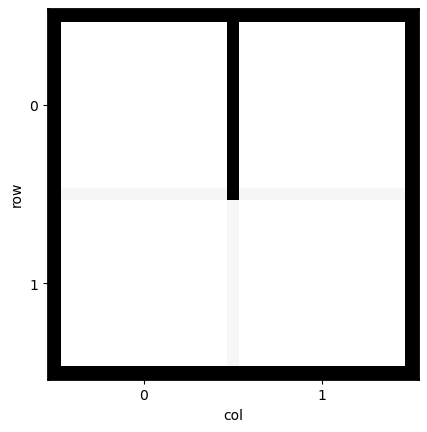

In [3]:
maze_2 = LatticeMazeGenerators.gen_dfs(
    grid_shape=(2, 2),
    lattice_dim=2,
    accessible_cells=None,
    max_tree_depth=None,
    start_coord=None,
)

MazePlot(maze_2).plot()

plt.show()

In [4]:
mult_agent = agent.CNN_Maze_Agents(5)
mult_agent.run_agent(maze_1,len_game=20,num_agents=5,epsilon=1,sample_prob=False)

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


[[0.21097429 0.12495297 0.24841945 0.18264759 0.23300573]]
1
[[0.22597568 0.14211759 0.22840142 0.19928232 0.20422299]]
2
[[0.22597568 0.14211759 0.22840142 0.19928232 0.20422299]]
3
[[0.21097429 0.12495297 0.24841945 0.18264759 0.23300573]]
4
[[0.22849408 0.1480475  0.23088263 0.1970414  0.19553435]]
5
[[0.22849408 0.1480475  0.23088263 0.1970414  0.19553435]]
6
[[0.21097429 0.12495297 0.24841945 0.18264759 0.23300573]]
7
[[0.22905332 0.12414169 0.25287673 0.17319444 0.2207338 ]]
8
[[0.22905332 0.12414169 0.25287673 0.17319444 0.2207338 ]]
9
[[0.22905332 0.12414169 0.25287673 0.17319444 0.2207338 ]]
10
[[0.21097429 0.12495297 0.24841945 0.18264759 0.23300573]]
11
[[0.21097429 0.12495297 0.24841945 0.18264759 0.23300573]]
12
[[0.21097429 0.12495297 0.24841945 0.18264759 0.23300573]]
13
[[0.22849408 0.1480475  0.23088263 0.1970414  0.19553435]]
14
[[0.22849408 0.1480475  0.23088263 0.1970414  0.19553435]]
15
[[0.22849408 0.1480475  0.23088263 0.1970414  0.19553435]]
16
[[0.22849408 0.14

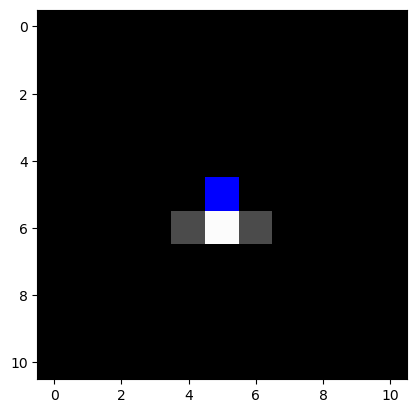

In [5]:
mult_agent.animate_last_replay(0)

In [ ]:
import gymnasium as gym
num_agents = 2
spatial = []
env = gym.make('Maze_env/MazeRunner-v0',num_agents=num_agents,vision_len=7,maze=maze_1,render_mode='human',
               obs_type = 'basic')
observations, info = env.reset()




episode_over_1 = False
episode_over_2 = False
i=0
while not episode_over_1 and i <100:
    action = []
    for a in range(num_agents):
        action.append(env.action_space.sample())
    observations, reward,terminated, truncated,info = env.step(action)
    
    episode_over = terminated or truncated
    i+=1
env.reset(options = {'new_maze': maze_2})
while not episode_over_2:
    action = []
    for a in range(num_agents):
        action.append(env.action_space.sample())
    observations, reward,terminated, truncated,info = env.step(action)
    
    episode_over = terminated or truncated

env.close()

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


KeyboardInterrupt: 

: 